In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Simple Linear Regression
df = pd.read_csv('Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [10]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

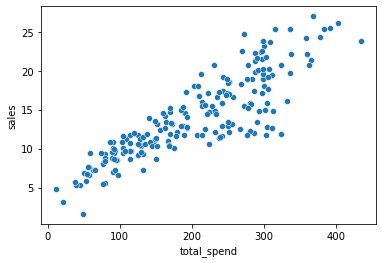

In [11]:
sns.scatterplot(data=df, x='total_spend', y='sales')

In [15]:
X = df['total_spend']
y = df['sales']
type(X)

pandas.core.series.Series

In [10]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [11]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [12]:
potential_spend = np.linspace(0, 500, 100)

In [13]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

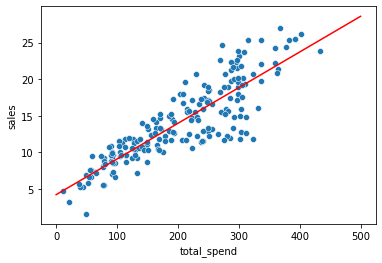

In [16]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')

In [17]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [18]:
predicted_sales

13.98060422

In [19]:
# Compare performances
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [20]:
pot_spend = np.linspace(0, 500, 100)

In [23]:
pred_sales = 3.07615033e-07 * pot_spend ** 3 + -1.89392449e-04 * pot_spend ** 2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

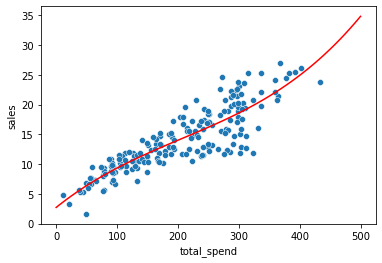

In [26]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend, pred_sales, color='red')

In [27]:
# scikit-learn
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Text(0.5, 1.0, 'Newspaper Spend')

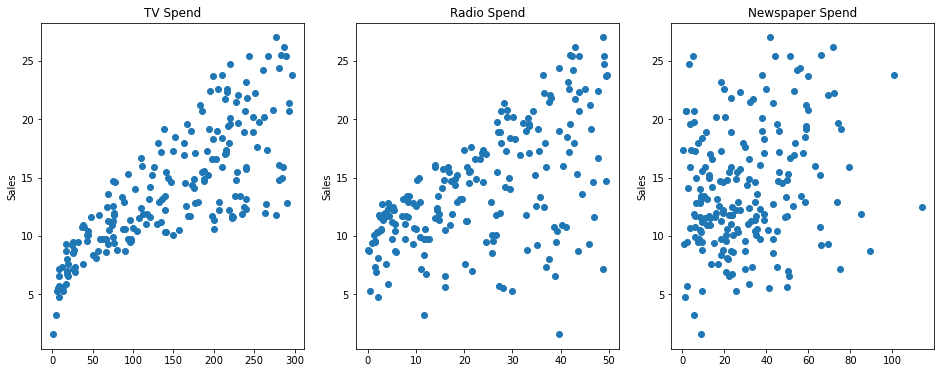

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

In [29]:
X = df.drop('sales', axis =1)

In [30]:
X

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0
...,...,...,...,...
195,38.2,3.7,13.8,55.7
196,94.2,4.9,8.1,107.2
197,177.0,9.3,6.4,192.7
198,283.6,42.0,66.2,391.8


In [1]:
y = df['sales']

NameError: name 'df' is not defined

In [32]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [33]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
len(df)

200

In [36]:
len(X_train)

140

In [37]:
X_train.head()

,TV,radio,newspaper,total_spend
85,193.2,18.4,65.7,277.3
183,287.6,43.0,71.8,402.4
127,80.2,0.0,9.2,89.4
53,182.6,46.2,58.7,287.5
100,222.4,4.3,49.8,276.5


In [39]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [40]:
len(X_test)

60

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [50]:
# Performance Evaluation 
# Regression task (continuous values) vs. Category task

In [51]:
# Mean Absolute Error 
## Con: MAE wonly punish large error

In [53]:
# Mean Sqaured Error 
# --> large error gets "punished" more significantly
# Con: the unit different from the original unit for label

In [54]:
# Root Mean Squared Error
# take square root of MSE

In [55]:
test_predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

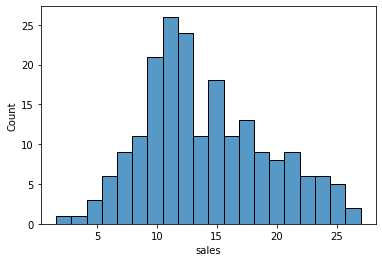

In [60]:
sns.histplot(data=df, x='sales', bins=20)

In [61]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [62]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993893

In [63]:
# Residual Plot

In [65]:
# the residual errors should be normally distributed
# if residual plot shows a clear pattern (not random), then linear regression is not valid

In [66]:
test_residuals = y_test - test_predictions

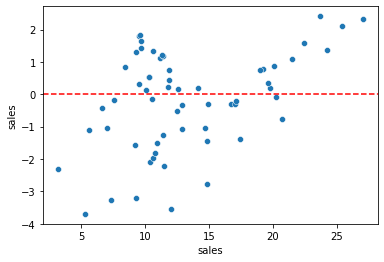

In [70]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

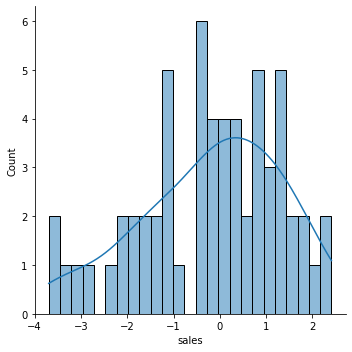

In [73]:
sns.displot(test_residuals, kde=True, bins=25) # almost normal

In [74]:
import scipy as sp

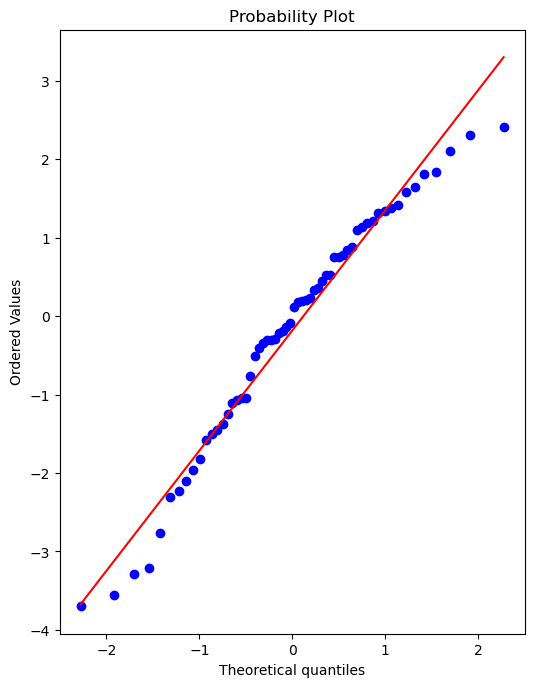

In [76]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [78]:
# Model Deployment
# save the model, and apply it to future data

In [82]:
final_model = LinearRegression()

In [87]:
final_model.fit(X.drop('total_spend', axis=1), y)

LinearRegression()

In [90]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [92]:
y_hat = final_model.predict(X.drop('total_spend', axis=1))

Text(0.5, 1.0, 'Newspaper Spend')

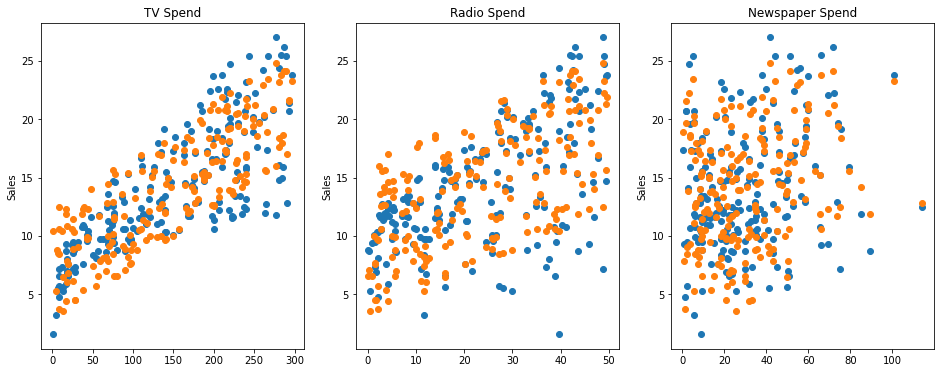

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

In [94]:
from joblib import dump, load

In [95]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [96]:
loaded_model=load('final_sales_model.joblib')

In [97]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [98]:
X.shape

(200, 4)

In [102]:
# 149 TV, 22 radio, 12 Newspaper
campaign = [[149, 22, 12]]

In [103]:
loaded_model.predict(campaign)

/Users/bellaxia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])